# Analisis de datos de la temperatura de la Ciudad de Mexico

 ### ¿Cambio climatico en la Ciudad de México?
 
Anando Purutama
junio 2016

    Sumario
    Introducción
    El Data Set
    Topico de Interes
    Codebook
        Variables
        
    Usiando Python
        Pyhton Code

##### Sumario

análisis de datos, graficas, correlaciones.

##### Introducción

Análisis de la temperatura en la Ciudad de México desde 1835 a 2013.
La ciudad de México ha venido experimentando cambios en el promedio de su temperatura a lo largo de mas de un siglo, a continuacion se muestran estos cambios. La CDMX ha pasado de un promedio de 14 a casi 16 grados en un siglo, un aumento de 2 grados. Pero este cambio ha sido constante y se ha acentuado en los últimos 50 años. Lo podemo ver claramente en la gráfica de la entrada/salida 23. En ella podemos observar la linea roja ascendente.


##### Data Set
Los datos fueron tomados de Barkeley Earth:http://berkeleyearth.org/source-files/
Y fueron trabajados mediante python 34 y Jupyter notebook.

##### Topico of Interes

La relacion entre la temperatura promedio de la Ciudad de México y el cambio climatico.

##### Codebook

Data set tres variables.

#####Variables

dt, AverageTemperature, AverageTemperatureUncertainty


##### Clasificación de Variables

Temperatura y su relacion promedio con el año

Usando Python / Python Code



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.fft import fft, ifft
from subprocess import check_output

%matplotlib inline

In [38]:
ciudad = pd.read_csv("temperaturaciudad.csv")

In [39]:
ciudad.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1835-01-01,13.086,1.942,Mexico,Mexico,20.09N,98.96W
1,1835-02-01,12.322,2.020,Mexico,Mexico,20.09N,98.96W
2,1835-03-01,13.874,2.271,Mexico,Mexico,20.09N,98.96W
3,1835-04-01,16.312,2.247,Mexico,Mexico,20.09N,98.96W
4,1835-05-01,16.851,1.893,Mexico,Mexico,20.09N,98.96W


In [40]:
print (len(ciudad))
print (len(ciudad.columns))

2145
7


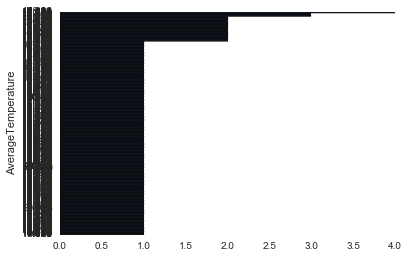

In [41]:
ciudad.groupby(['AverageTemperature']).count()['dt'].sort_values().plot(kind = 'barh')

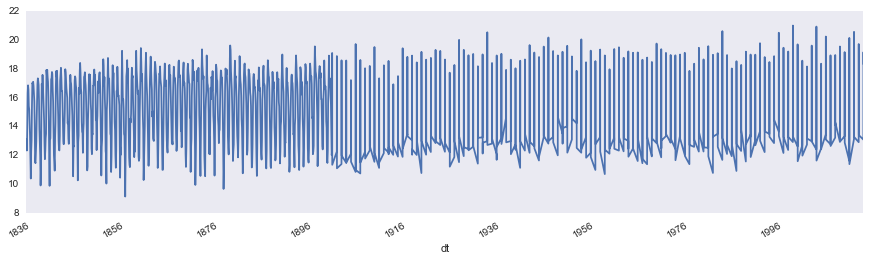

In [42]:
ciudad1 = pd.read_csv('temperaturaciudad.csv', index_col='dt', parse_dates=True)


dt = ciudad1['1835-01-01':]

# Plot initial data
plt.figure(figsize=(15,4))
ciudad1['AverageTemperature'].plot()
plt.grid()
plt.show()

C:\Python34\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


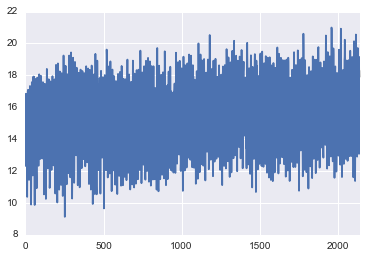

In [43]:
dt = ciudad1['1835-01-01':'8/1/2013'].resample('A').dropna()
g = sns.tsplot(ciudad1.AverageTemperature)

C:\Python34\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(adjust=True,ignore_na=False,min_periods=0,com=14.5).mean()
  if __name__ == '__main__':


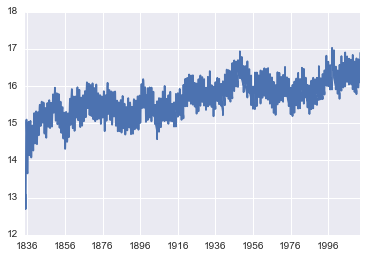

In [44]:
plot = plt.plot(ciudad1.index, pd.stats.moments.ewma(ciudad1.AverageTemperature, com = 14.5))

In [10]:
c1 = ciudad["City"].value_counts(sort=False, dropna=False)
print(c1)
print (ciudad.sort_index())

Mexico    2145
Name: City, dtype: int64
              dt  AverageTemperature  AverageTemperatureUncertainty    City  \
0     1835-01-01              13.086                          1.942  Mexico   
1     1835-02-01              12.322                          2.020  Mexico   
2     1835-03-01              13.874                          2.271  Mexico   
3     1835-04-01              16.312                          2.247  Mexico   
4     1835-05-01              16.851                          1.893  Mexico   
5     1835-06-01              16.544                          2.086  Mexico   
6     1835-07-01              15.403                          1.994  Mexico   
7     1835-08-01              15.179                          1.435  Mexico   
8     1835-09-01              14.164                          2.089  Mexico   
9     1835-10-01              13.381                          1.478  Mexico   
10    1835-11-01              11.683                          1.968  Mexico   
11    1835-1

In [45]:
ciudad_percent = ciudad['City'].value_counts(sort = False, dropna = False, normalize = True)
print (ciudad_percent.sort_index())

Mexico    1.0
Name: City, dtype: float64


In [46]:
print("describe number of")
desc1 = ciudad["City"].describe()
print(desc1)

describe number of
count       2145
unique         1
top       Mexico
freq        2145
Name: City, dtype: object


In [47]:
median =ciudad.groupby("AverageTemperature").median()
print (median)

                    AverageTemperatureUncertainty
AverageTemperature                               
9.127                                      2.8420
9.655                                      1.4260
9.871                                      1.7350
9.896                                      2.5690
9.933                                      1.9850
10.028                                     2.3090
10.252                                     2.0010
10.273                                     1.4870
10.378                                     1.9210
10.437                                     2.4130
10.533                                     1.8820
10.539                                     1.5870
10.557                                     2.1320
10.558                                     0.7970
10.583                                     1.6770
10.590                                     1.5830
10.684                                     0.3580
10.729                                     1.0640


In [16]:
median1 =ciudad.groupby("AverageTemperature").max()
print (median1)

                            dt  AverageTemperatureUncertainty    City Country  \
AverageTemperature                                                              
9.127               1856-01-01                          2.842  Mexico  Mexico   
9.655               1876-12-01                          1.426  Mexico  Mexico   
9.871               1839-12-01                          1.735  Mexico  Mexico   
9.896               1838-01-01                          2.569  Mexico  Mexico   
9.933               1870-12-01                          1.985  Mexico  Mexico   
10.028              1852-01-01                          2.309  Mexico  Mexico   
10.252              1845-12-01                          2.001  Mexico  Mexico   
10.273              1859-12-01                          1.487  Mexico  Mexico   
10.378              1835-12-01                          1.921  Mexico  Mexico   
10.437              1854-12-01                          2.413  Mexico  Mexico   
10.533              1844-12-

In [48]:
ciudad['dt'] = pd.to_datetime(ciudad['dt'])
ciudad['year'] = ciudad['dt'].dt.year
ciudad_year_AveTemp = ciudad.loc[:,['year','AverageTemperature']]
ciudad_year_AveTemp = ciudad_year_AveTemp.dropna()

In [49]:
ciudad_year_AveTemp.head()

,year,AverageTemperature
0,1835,13.086
1,1835,12.322
2,1835,13.874
3,1835,16.312
4,1835,16.851


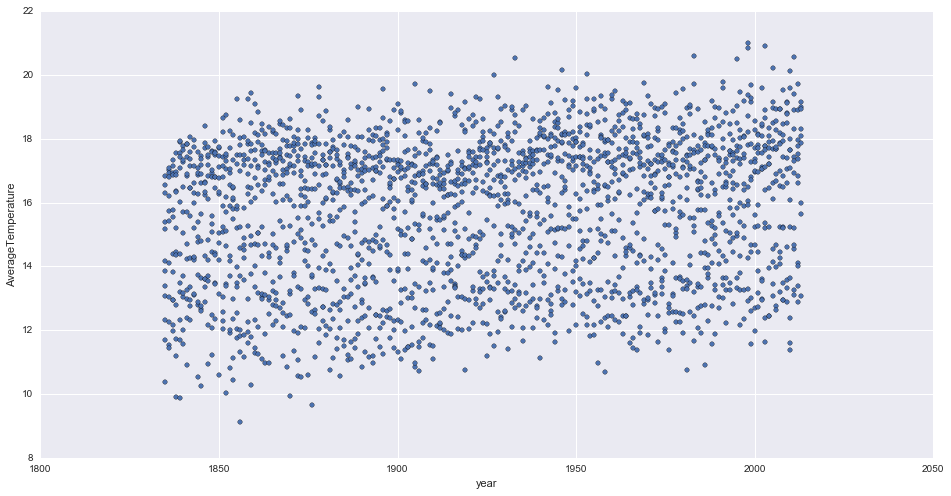

In [21]:
ciudad_year_AveTemp.plot(kind='scatter', x='year', y='AverageTemperature', figsize=(16,8))

In [50]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='AverageTemperature ~ year', data = ciudad_year_AveTemp).fit()
lm.params

Intercept    1.747471
year         0.007261
dtype: float64

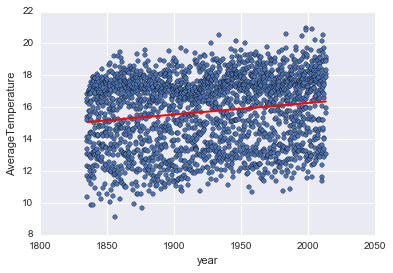

In [23]:
x_new = pd.DataFrame({'year': [ciudad_year_AveTemp.year.min(),
                                                 ciudad_year_AveTemp.year.max()]})
preds = lm.predict(x_new)
ciudad_year_AveTemp.plot(kind='scatter', x='year', y='AverageTemperature')
plt.plot(x_new, preds, c='red', linewidth=2)

In [51]:
c1= ciudad["AverageTemperature"].value_counts(sort=False)
print (c1)

print("percentages for CRATER_ID in the past 12 months,yes=1")
p1 = ciudad["AverageTemperature"].value_counts(sort=False, normalize=True)
print (p1)

c2= ciudad["AverageTemperatureUncertainty"].value_counts(sort=False)
print (c2)

p2 = ciudad["AverageTemperatureUncertainty"].value_counts(sort=False, normalize=True)
print (p2)

ct1 = ciudad.groupby("AverageTemperature").size()
print (ct1)


18.825    2
13.574    1
12.151    1
17.989    1
17.407    1
18.627    1
12.875    1
13.750    1
14.750    2
17.075    1
17.904    1
18.000    1
16.594    2
21.000    1
17.452    1
17.450    1
15.033    1
14.700    1
12.301    1
17.892    1
13.051    1
11.441    1
12.691    1
13.316    1
14.816    3
15.691    2
16.816    4
17.441    3
18.816    2
17.427    1
         ..
11.493    1
11.743    1
13.243    1
13.743    1
19.365    1
16.243    1
16.868    1
15.580    1
16.774    1
16.313    2
15.449    1
12.936    1
15.260    1
12.705    1
16.324    1
14.344    1
17.774    1
17.949    1
10.684    1
11.184    1
13.684    1
14.684    2
16.559    1
16.934    1
14.535    1
11.324    1
17.570    1
12.949    1
11.637    1
17.945    1
Name: AverageTemperature, dtype: int64
percentages for CRATER_ID in the past 12 months,yes=1
18.825    0.000932
13.574    0.000466
12.151    0.000466
17.989    0.000466
17.407    0.000466
18.627    0.000466
12.875    0.000466
13.750    0.000466
14.750    0.000932
17.0

In [52]:
sub2 = ciudad[["AverageTemperature", "AverageTemperatureUncertainty"]]
sub2.head (25)

,AverageTemperature,AverageTemperatureUncertainty
0,13.086,1.942
1,12.322,2.020
2,13.874,2.271
3,16.312,2.247
4,16.851,1.893
5,16.544,2.086
6,15.403,1.994
7,15.179,1.435
8,14.164,2.089
9,13.381,1.478


In [54]:
import seaborn


Describir temperatura promedio
count    2145.000000
mean       15.717422
std         2.285342
min         9.127000
25%        13.702000
50%        16.322000
75%        17.511000
max        21.000000
Name: AverageTemperature, dtype: float64


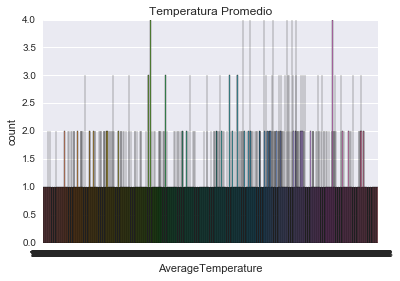

In [55]:
seaborn.countplot(x='AverageTemperature', data=sub2)
plt.xlabel('AverageTemperature')
plt.title('Temperatura Promedio')
print ('Describir temperatura promedio')
ejmorph = sub2['AverageTemperature'].describe()
print (ejmorph)

In [58]:

model1 = smf.ols(formula='AverageTemperature ~ C(AverageTemperatureUncertainty)', data=sub2).fit() 
#results1 = model1.fit()

print (model1.summary())


                            OLS Regression Results                            
Dep. Variable:     AverageTemperature   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     1.242
Date:                Sat, 25 Jun 2016   Prob (F-statistic):           0.000209
Time:                        18:03:03   Log-Likelihood:                -3856.9
No. Observations:                2145   AIC:                         1.002e+04
Df Residuals:                     991   BIC:                         1.657e+04
Df Model:                        1153                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------

chi-square value, p value, expected counts
(0.0, 1.0, 0, array([ 1.,  1.,  1., ...,  1.,  1.,  1.]))


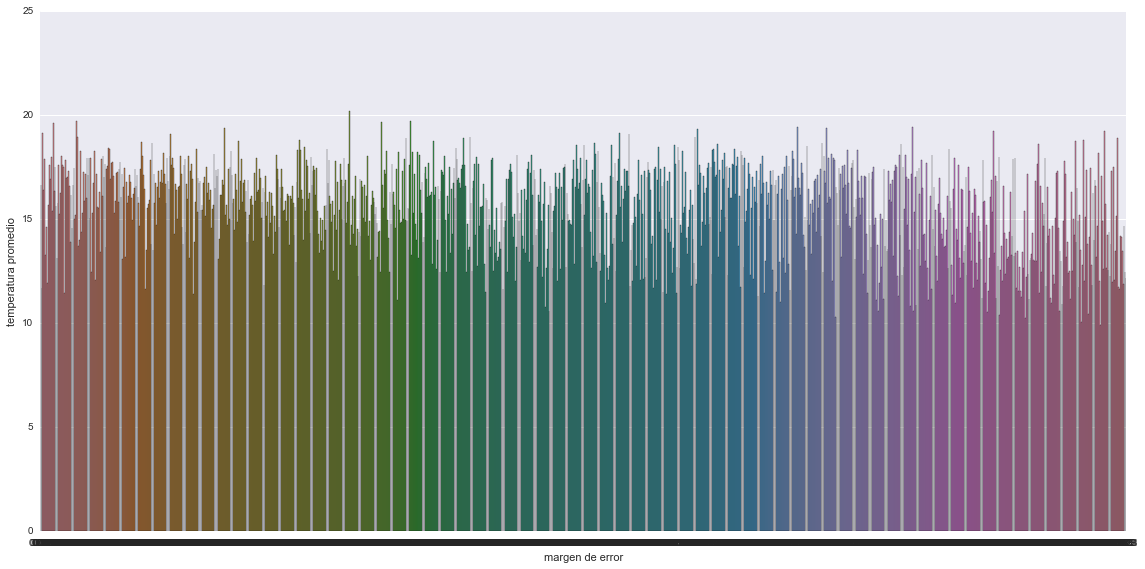

In [44]:
import scipy.stats
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)

seaborn.factorplot(x="AverageTemperatureUncertainty", y="AverageTemperature", data=sub2, kind="bar", ci=None,size=8,aspect=2)
plt.xlabel('margen de error')
plt.ylabel('temperatura promedio')

Asociacion entre margen de error y promedio de temperatura
(-0.2505182145671998, 4.7100420114210572e-32)
Resultados de regresion lineal
LinregressResult(slope=-0.90756378573720142, intercept=16.454573186331032, rvalue=-0.25051821456719986, pvalue=4.71004201141979e-32, stderr=0.07576215457996803)
R2:  0.0627593758299


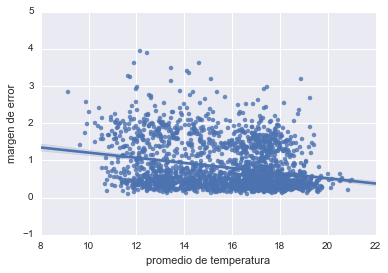

In [43]:
from scipy import stats
import statsmodels.api as sm
print ("Asociacion entre margen de error y promedio de temperatura")
print (stats.pearsonr(sub2["AverageTemperatureUncertainty"], sub2["AverageTemperature"]))
r_value = stats.linregress(sub2["AverageTemperatureUncertainty"], sub2["AverageTemperature"])
print ("Resultados de regresion lineal")
print (r_value)
X = sm.add_constant(sub2["AverageTemperatureUncertainty"])
model= sm.OLS(sub2["AverageTemperature"], X)
results = model.fit()
std_error = np.sqrt(results.mse_resid)

print('R2: ', results.rsquared)

scat1 = seaborn.regplot(x="AverageTemperature", y="AverageTemperatureUncertainty", fit_reg=True, data=sub2)
plt.xlabel("promedio de temperatura")
plt.ylabel("margen de error")
plt.show()


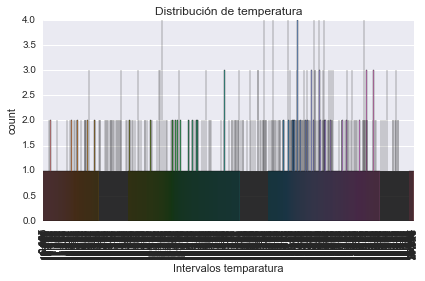

In [39]:
plt.figure(1)
seaborn.countplot(x='AverageTemperature', data=sub2)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.xlabel('Intervalos temparatura')
plt.title('Distribución de temperatura')
plt.tight_layout()
plt.savefig("01latitudesbarplot.png")

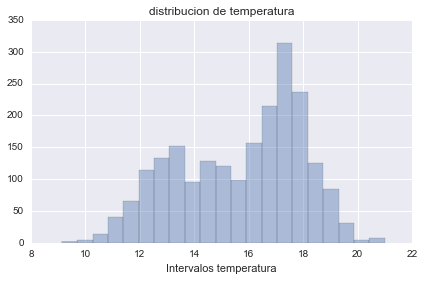

In [90]:
plt.figure(2)
seaborn.distplot(ciudad['AverageTemperature'].dropna(), kde=False)
plt.xlabel('Intervalos temperatura')
plt.title('distribucion de temperatura')
plt.tight_layout()
plt.savefig("02longitudesdistplot.png")


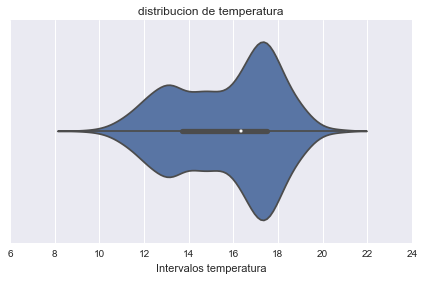

In [87]:
plt.figure(2)
seaborn.violinplot(ciudad['AverageTemperature'].dropna(), kde=False)
plt.xlabel('Intervalos temperatura')
plt.title('distribucion de temperatura')
plt.tight_layout()
plt.savefig("02longitudesdistplot.png")